# Exercise 6

This week we will practice how to work with OpenStreetMap data and conduct network analysis in Python.

## Problem 1 (8 points)

There are two csv-files in the [/data](./data) folder:

- `origins.csv`
- `destinations.csv`

The files contain coordinates of the origin and destination points in certain area of the world as latitude and longitude coordinates (decimal degrees). 

**1: Your task is to find out where the points are located based on the coordinates found in the files** (which city/country?) Use your GIS skills to find out the solution in two different ways.

A. detect the location using **visualization techniques**; plot the points on top of a background map and see where they are located! 

In [129]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
from pyproj import CRS

orig = pd.read_csv('data/origins.csv')
dest = pd.read_csv('data/destinations.csv')

In [2]:
orig_data = gpd.GeoDataFrame()
dest_data = gpd.GeoDataFrame()

orig_data['geometry'] = None
dest_data['geometry'] = None

orig_data['geometry'] = orig.apply(lambda row: Point(row['x'], row['y']), axis=1)
dest_data['geometry'] = dest.apply(lambda row: Point(row['x'], row['y']), axis=1)

C:\Users\alfoldybalint\.conda\envs\python_gis\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [3]:
# Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
orig_data.crs = CRS.from_epsg(4326).to_wkt()
dest_data.crs = CRS.from_epsg(4326).to_wkt()

In [7]:
import folium
import matplotlib.pyplot as plt

# Create a Map instance
m = folium.Map(location=list(orig_data.loc[0]['geometry'].coords)[0][::-1], zoom_start=11, control_scale=True)

# add marker one by one on the map
for n, i in orig_data.iterrows():
   folium.Marker(
       location=[i['geometry'].y, i['geometry'].x],
       icon = folium.Icon(color = "red", icon="location-pin", prefix='fa')
       ).add_to(m)

# add marker one by one on the map
for n, i in dest_data.iterrows():
   folium.Marker(
       location=[i['geometry'].y, i['geometry'].x],
       icon = folium.Icon(color = "green", icon="location-pin", prefix='fa')
       ).add_to(m)

folium.LayerControl().add_to(m)

m

B. Detect the location using **geocoding techniques**; reverse geocode at least one of the locations (see [hints from geopy documentation](https://geopy.readthedocs.io/en/stable/index.html?highlight=reverse#module-geopy.geocoders)). As output, you should print out information about the location (can be a full address, or just the name of the city):

In [12]:
from geopandas.tools import reverse_geocode
import os

os.environ['HTTP_PROXY'] = "http://10.1.10.99:8080"
os.environ['HTTPS_PROXY'] ="http://10.1.10.99:8080"

orig_data = reverse_geocode(orig_data['geometry'])
dest_data = reverse_geocode(dest_data['geometry'])

In [13]:
orig_data

,geometry,address
0,POINT (24.61569 59.40510),"Astangu Rimi super, 4, Kotermaa, 13524, Koterm..."
1,POINT (24.64080 59.40733),"Grossi Toidukaubad, 35b, Järveotsa tee, 13520,..."
2,POINT (24.66858 59.40177),"41, Ehitajate tee, 12612, Ehitajate tee, Talli..."
3,POINT (24.69788 59.44769),"Grossi, 3, Kari, 10311, Kari, Tallinn, Eesti"
4,POINT (24.76800 59.43026),"Grossi Toidukaubad, 14, Lastekodu, 10113, Last..."
5,POINT (24.79183 59.42786),"Grossi Toidukaubad, Majaka, 11412, Majaka, Tal..."
6,POINT (24.75396 59.43718),"Viru väljak, 10111, Tallinn, Eesti"
7,POINT (24.87904 59.49121),"115, Randvere tee, 11913, Randvere tee, Tallin..."
8,POINT (24.68902 59.40727),"103, A. H. Tammsaare tee, 12913, A. H. Tammsaa..."
9,POINT (24.73559 59.42626),"6, Väike-Ameerika, 10129, Väike-Ameerika, Tall..."


**2: Retrieve OpenStreetMap data (only streets that can be driven with car) from the area where the points are located.**

- Specify a Polygon that covers the **extent where all the points are located*. 
- Store the extent as a Shapely Polygon stored in a variable called `graph_extent`.
- Add a little bit of buffer around the extent for downloading the graph, so that you cover all routes between the points.
- See hints from this [week's hints page](https://autogis-site.readthedocs.io/en/latest/lessons/L6/exercise-6.html#hints) on how to define the extent.

In [15]:
all_data = orig_data.append(dest_data)

In [23]:
graph_extent = all_data.unary_union.convex_hull.buffer(0.1)

In [24]:
# NON-EDITABLE TEST CELL
# The extent should be a shapely Polygon
print(graph_extent)

POLYGON ((24.590364794085968 59.22698433731699, 24.58081405981788 59.22445353467007, 24.57106019633306 59.22287757965267, 24.56119842229735 59.22227185697204, 24.551325009815415 59.222642279783074, 24.541536344608186 59.22398523196319, 24.531927985081083 59.22628760341351, 24.522593729468664 59.229526918041536, 24.513624700162314 59.23367155317616, 24.505108454159902 59.238681048272845, 24.497128128321357 59.24450649989551, 24.48976162777426 59.251091039119096, 24.48308086539243 59.258370386692526, 24.477151059771728 59.266273480542274, 24.47203009855644 59.274723169490926, 24.467767973331494 59.28363696641839, 24.464406291597147 59.29292785351351, 24.461977870590413 59.30250513175482, 24.46050641691828 59.31227530632788, 24.460006295130327 59.3221429993356, 24.46048238748981 59.3320118808914, 24.46193004631232 59.341785609505955, 24.464335139337155 59.351368772587065, 24.467674187688537 59.36066781787164, 24.47191459507992 59.36959196669673, 24.477014966023756 59.37805410019441, 24.53

In [25]:
# NON-EDITABLE TEST CELL
# The extent should be a shapely Polygon
print(type(graph_extent))

<class 'shapely.geometry.polygon.Polygon'>


- Use the polygon to fetch the drivable network data with `.graph_from_polygon()` function 
- Remember to specify correct `network_type`
- see [osmnx docs](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.core.graph_from_polygon) for more details
- store the street network a variable called `graph`

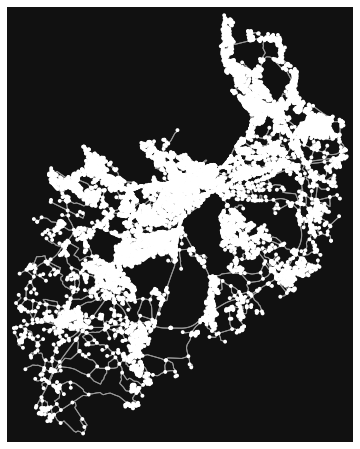

In [27]:
import osmnx as ox
graph = ox.graph_from_polygon(graph_extent, network_type="drive")

# Plot the streets
fig, ax = ox.plot_graph(graph)

In [28]:
# NON-EDITABLE TEST CELL
# The graph should be a networkx MultiDiGraph
print(type(graph))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


In [29]:
# NON-EDITABLE TEST CELL
# Check the graph size. The example solution graph size is 28756 (don't panic if yours is not exactly the same, you can still proceed!)
print(graph.size())

29259


**3: Reproject the data into UTM projection, and plot:**
  - the street network (with `gray` color and line width of `0.5` and alpha set to `0.7`)
  - the origin points (with `red` color)
  - destination points (with `blue` color)
  
In the end you should have a map that looks something like following:

![](img/route_network_with_OD_points.png)

In [33]:
# Retrieve nodes and edges
# Project the data
graph_proj = ox.project_graph(graph) 
nodes, edges = ox.graph_to_gdfs(graph_proj)
edges.head()

osmid  oneway lanes  ref           name  \
u          v          key                                                
6920814    11279496   0     91563671    True     3    1  Peterburi tee   
           1584679220 0     97114010    True     1  NaN            NaN   
11279496   728644603  0     91563671    True     3    1  Peterburi tee   
1584679220 1103265665 0     97114010    True     1  NaN            NaN   
           1606801948 0    147459192    True     1  NaN            NaN   

                              highway maxspeed    length  \
u          v          key                                  
6920814    11279496   0         trunk       90   418.566   
           1584679220 0    trunk_link      NaN   233.270   
11279496   728644603  0         trunk       90  2103.408   
1584679220 1103265665 0    trunk_link      NaN    41.646   
           1606801948 0    trunk_link      NaN    71.331   

                                                                    geometry  \
u          v          key                                                      
6920814    11279496   0    LINESTRING (382433.690 6591624.034, 382511.965...   
           1584679220 0    LINESTRING (382433.690 6591624.034, 382487.158...   
11279496   728644603  0    LINESTRING (382845.094 6591705.600, 382890.295...   
1584679220 1103265665 0    LINESTRING (382603.745 6591535.485, 382605.264...   
           1606801948 0    LINESTRING (382603.745 6591535.485, 382598.417...   

                          tunnel access width junction bridge  
u          v          key                                      
6920814    11279496   0      NaN    NaN   NaN      NaN    NaN  
           1584679220 0      NaN    NaN   NaN      NaN    NaN  
11279496   728644603  0      NaN    NaN   NaN      NaN    NaN  
1584679220 1103265665 0      NaN    NaN   NaN      NaN    NaN  
           1606801948 0      NaN    NaN   NaN      NaN    NaN

In [39]:
from pyproj import CRS
orig_data = orig_data.to_crs(CRS.to_wkt(edges.crs))
dest_data = dest_data.to_crs(CRS.to_wkt(edges.crs))

In [116]:
orig_data.crs == dest_data.crs == edges.crs == nodes.crs

True

In [57]:
extent_gdf = gpd.GeoDataFrame(index=[0], crs=all_data.crs, geometry=[graph_extent])
extent_gdf = extent_gdf.to_crs(CRS.to_wkt(edges.crs))

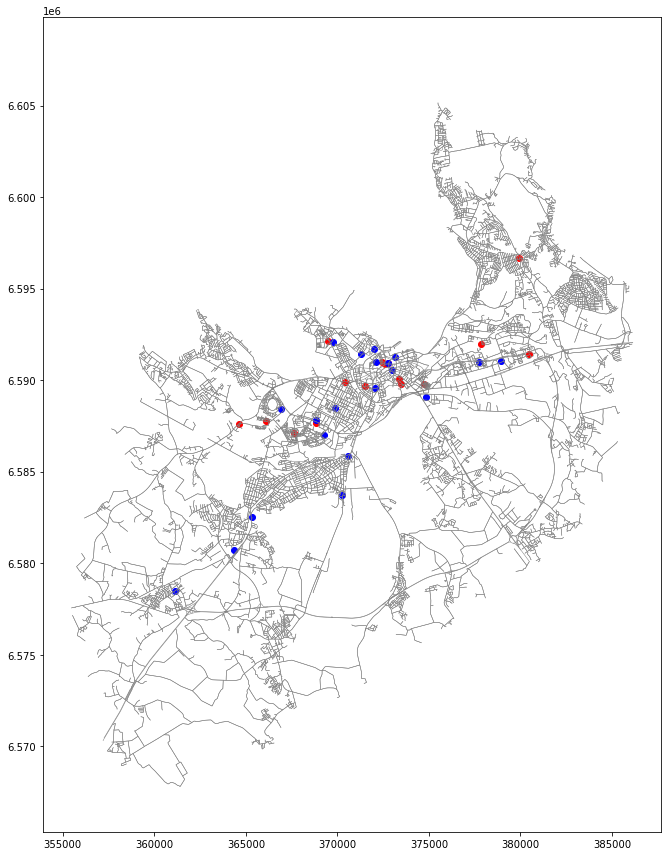

In [65]:
# Create a subplot object for plotting the layers onto a common map
fig, ax = plt.subplots(figsize=(18,12))

extent_gdf.plot(ax=ax, facecolor='white', alpha=0.7)

edges.plot(ax=ax, linewidth=0.5, edgecolor='grey')

orig_data.plot(ax=ax, facecolor='red')

dest_data.plot(ax=ax, facecolor='blue')
plt.tight_layout()

### Done!

That's it! Now you can continue with problem 2. 

## Problem 2 (12 points)

In this problem we practice conducting shortest path routing.

### Steps

**1: Calculate the shortest paths between all origin points (16) and destination points (20) using the `length` of the road segments as the impedance measure (in total 320 routes).** 

- To be able to find the shortest paths, you should find the nearest nodes from the graph for both origin and destination points. 
- Notice: if the closest node is the same for both origin and destination point, you should skip the shortest path calculation. - After the routing, you should add the shortest path routes as LineString geometries into a GeoDataFrame called `routes`. 
- You should use the projected graph as the network for the analyses
- remember to use informative variable names, and to comment your code!

In [159]:
# Store the shortest path routes as LineString geometries in a GeoDataFrame called routes:
import warnings
warnings.filterwarnings('ignore')

orig_data['closest_node_id'] = orig_data.apply(lambda row: ox.get_nearest_node(graph_proj, (row['geometry'].y, row['geometry'].x), method='euclidean'), axis=1)
dest_data['closest_node_id'] = dest_data.apply(lambda row: ox.get_nearest_node(graph_proj, (row['geometry'].y, row['geometry'].x), method='euclidean'), axis=1)

In [168]:
import networkx as nx

# Calculate the shortest path
routes = gpd.GeoDataFrame([], geometry='geometry', crs=nodes.crs, columns=['Origin address', 'Destination address', 'geometry', 'route_dist'])

for ido, orig in orig_data.iterrows():
    for idd, dest in dest_data.iterrows():
        shortest_path_id = nx.shortest_path(G=graph_proj, source=orig['closest_node_id'], target=dest['closest_node_id'], weight='length')
        if len(shortest_path_id) > 1:
            route_nodes = nodes.loc[shortest_path_id]
            route_line = LineString(list(route_nodes.geometry.values))
            length = route_line.length
            routes = shortest_path.append({'Origin address': orig['address'],'Destination address': dest['address'],  'geometry': route_line, 'route_dist': length}, ignore_index = True)


In [169]:
routes.head()

,Origin address,Destination address,geometry,route_dist
0,"Astangu Rimi super, 4, Kotermaa, 13524, Koterm...","Rimi, Vikerlase, 13616, Vikerlase, Tallinn, Eesti","LINESTRING (364723.450 6587654.149, 364688.064...",14754.554329
1,"Astangu Rimi super, 4, Kotermaa, 13524, Koterm...","Laagri Rimi apteek, Pärnu mnt, 76401, Pärnu mn...","LINESTRING (364723.450 6587654.149, 364688.064...",9830.491880
2,"Astangu Rimi super, 4, Kotermaa, 13524, Koterm...","Sportland, Mustakivi tee, 13912, Mustakivi tee...","LINESTRING (364723.450 6587654.149, 364688.064...",16061.603078
3,"Astangu Rimi super, 4, Kotermaa, 13524, Koterm...","Magistrali keskus, 201, Sõpruse pst, 13416, Sõ...","LINESTRING (364723.450 6587654.149, 365376.539...",5243.121247
4,"Astangu Rimi super, 4, Kotermaa, 13524, Koterm...","Hesburger, Ahtri, 10151, Ahtri, Tallinn, Eesti","LINESTRING (364723.450 6587654.149, 364688.064...",10165.731822


**2: Calculate the distance of the routes in meters into a new column called `route_dist`.**
 

In [170]:
# NON-EDITABLE TEST CELL
print("Shortest distance:", round(routes['route_dist'].min()), "meters")

Shortest distance: 275 meters


In [171]:
# NON-EDITABLE TEST CELL (longest distance in the example solution is 29177 meters)
print("Longest distance:", round(routes['route_dist'].max()), "meters")

Longest distance: 28725 meters


**3: Plot all the routes on top of the street network.** 

In the end you should have something like following:
 
 ![](img/routings.png)

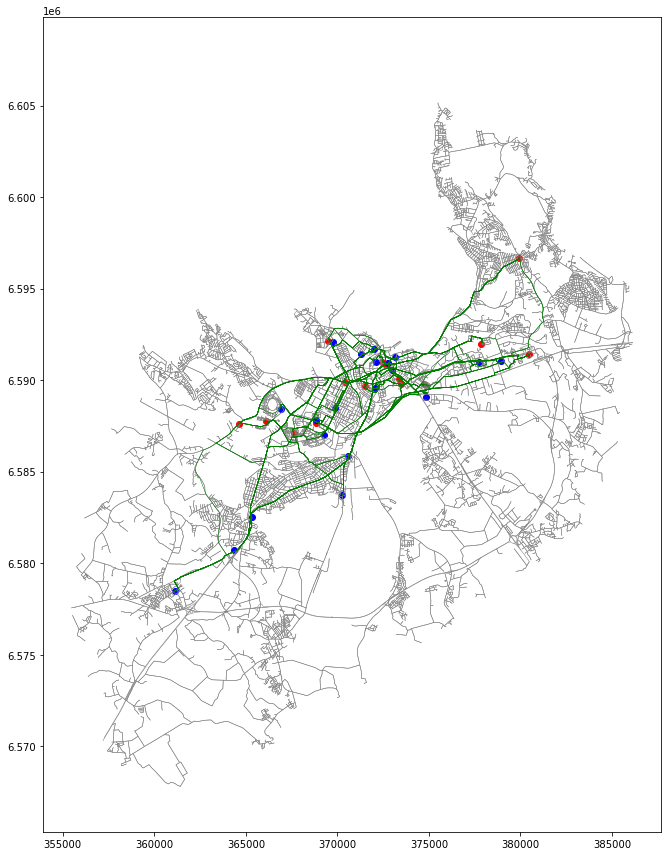

In [173]:
# Create a subplot object for plotting the layers onto a common map
fig, ax = plt.subplots(figsize=(18,12))

extent_gdf.plot(ax=ax, facecolor='white', alpha=0.7)

edges.plot(ax=ax, linewidth=0.5, edgecolor='grey')
routes.plot(ax=ax, linewidth=0.5, edgecolor='green')

orig_data.plot(ax=ax, facecolor='red')

dest_data.plot(ax=ax, facecolor='blue')
plt.tight_layout()

**4: Calculate the total distance of all the routes (i.e. sum of all route distances)** Update the `total_distance` based on your calculations:

In [174]:
total_distance = 0

total_distance = routes['route_dist'].sum()

In [175]:
# NON-EDITABLE TEST CELL (example solution: 2468 kilometers)
#Print your solution:
print("Total distance of all routes is: %.0f kilometers" % (total_distance / 1000))


Total distance of all routes is: 2448 kilometers


### Done!

That's it! Now you have finished all the practical exercises of the course (except final assignment), congratulations! :)